## Replication for "Asymmetry by Design", August 4, 2020
### By Adam Goldstein and Charlie Eaton

### Figure A5: Regression adjusted means by multibrand status and investor ownership

In [1]:
*ssc install gr0070

In [2]:
%set graph_format svg

In [3]:
quietly {
quietly use data/d_unitidasymmetry, clear
quietly set scheme plotplain
quietly est clear

quietly collapse (rawsum) sftesale sftetotl (mean) all_under system_under grad_rate_150_p_w ///
loan_amount_borrower_c_w tuitionall_c_w selective white_share_w black_share_w hisp_share_w ///
pell_grants_per_fte_c_w ft_faculty_per_100fte_w dpcttype_health dpcttype_law ///
dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz online ///
(first) state_n (min) iclevel (max) law_enf_frst_this_yr multi_brand investor ///
    , by(systemid year)

quietly gen fracsales2= sftesale /sftetotl * 100

quietly xtset systemid year

quietly label var multi_brand "Multi-brand indicator"
quietly label var fracsales2 "Employees in sales %"

quietly label var law_enf_frst_this_yr "Probability of law enforcement action"

quietly xtset systemid year

**Adjusted Sales
foreach var in fracsales2 { 
    
 reg `var' i.investor##i.multi_brand system_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* i.year ,    cluster(systemid)

quietly margins  i.multi_brand if investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.multi_brand if investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}

quietly foreach var in law_enf_frst_this_yr {
    
quietly logistic f2.`var' i.investor##i.multi_brand system_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* i.year ,    cluster(systemid) ro

quietly margins  i.multi_brand if investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.multi_brand if investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}   
}

In [4]:
quietly {
quietly use data/d_unitidasymmetry, clear

label var tuitionall_c_w "Tuition (2015$)"
label var multi_brand "Multi-brand indicator"

foreach var in tuitionall_c_w loan_amount_borrower_c_w { 
    
 reg `var' i.investor##i.multi_brand system_under all_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* grad_rate_150_p_w i.state_n i.year ,    cluster(systemid)

quietly margins  i.multi_brand if investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.multi_brand if investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}   

foreach var in grad_rate_150_p_w { 

 reg `var' i.investor##multi_brand system_under online all_under i.iclevel dpcttype* i.year ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w selective tuitionall_c_w i.state_n ,    cluster(systemid)

quietly margins  i.multi_brand#i.investor, atmeans

quietly margins  i.multi_brand if investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.multi_brand if investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'' %) title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace)    
}
}

In [5]:
quietly {
    xtset unitid year
quietly gen l2investor=l2.investor
quietly gen l2multi_brand=l2.multi_brand
quietly replace investor=l2investor
quietly replace multi_brand=l2multi_brand

foreach var in ft_faculty_per_100fte_w { 
    
 reg `var' i.investor##i.multi_brand system_under all_under online selective i.iclevel ///
pell_grants_per_fte_c_w white_share_w black_share_w hisp_share_w dpcttype* tuitionall_c_w i.state_n  i.year ,    cluster(systemid)

quietly margins  i.multi_brand if investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.multi_brand if investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}   
}

In [6]:
quietly {
    quietly use data/d_opeidasymmetry, clear

sort opeid year

quietly by opeid: gen l2investor=investor[_n-2]
quietly by opeid: gen l2multi_brand=multi_brand[_n-2]
label var l2multi_brand "Multi-brand indicator" 

qui replace pell_grants_per_fte_c_w=l1.pell_grants_per_fte_c_w if year==2016
    
 quietly    nbreg claimcount i.l2multi_brand##i.l2investor ///
all_under system_under online selective ib3.iclevel ///
white_share_w black_share_w hisp_share_w  dpcttype* ///
pell_grants_per_fte_c_w i.state_n, cluster(systemid) rob noomitted

quietly margins  i.l2multi_brand if l2investor==1, atmeans 
quietly marginsplot, name(defenseinvest, replace) recast(bar) ///
ytitle (Fraud claims) title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins   i.l2multi_brand if l2investor==0, atmeans 
quietly marginsplot, name(defenseother, replace) recast(bar) ///
ytitle (Fraud claims) title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine defenseother defenseinvest, row(1) ycommon name(defense, replace)

quietly keep if rankopeid==1
quietly sort opeid year
drop l2multi_brand l2investor
quietly by opeid: gen l2investor=investor[_n-2]
quietly by opeid: gen l2multi_brand=multi_brand[_n-2]

label var l2multi_brand "Multi-brand indicator"  

quietly label var mn_earn_wne_p6_c_w "Earnings (2015$)"
quietly label var rpy_3yr_rt_supp_w "Loan repayment %"
    
foreach var in mn_earn_wne_p6_c_w rpy_3yr_rt_supp_w  { 

quietly reg `var' i.l2multi_brand##i.l2investor ///
all_under system_under online selective iclevel ///
white_share_w black_share_w hisp_share_w dpcttype* tuitionall_c_w ///
    i.state_n i.year earn_pct_lo , cluster(systemid)

quietly margins  i.l2multi_brand if l2investor==1, atmeans 
quietly marginsplot, name(`var'invest, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Investor ownership, size(large))  plotopts(barw(.8))

quietly margins  i.l2multi_brand if l2investor==0, atmeans 
quietly marginsplot, name(`var'other, replace) recast(bar) ///
ytitle(`: variable label `var'') title(Other ownership, size(large))  plotopts(barw(.8))

quietly graph combine `var'other `var'invest, row(1) ycommon name(`var', replace) 
}
}

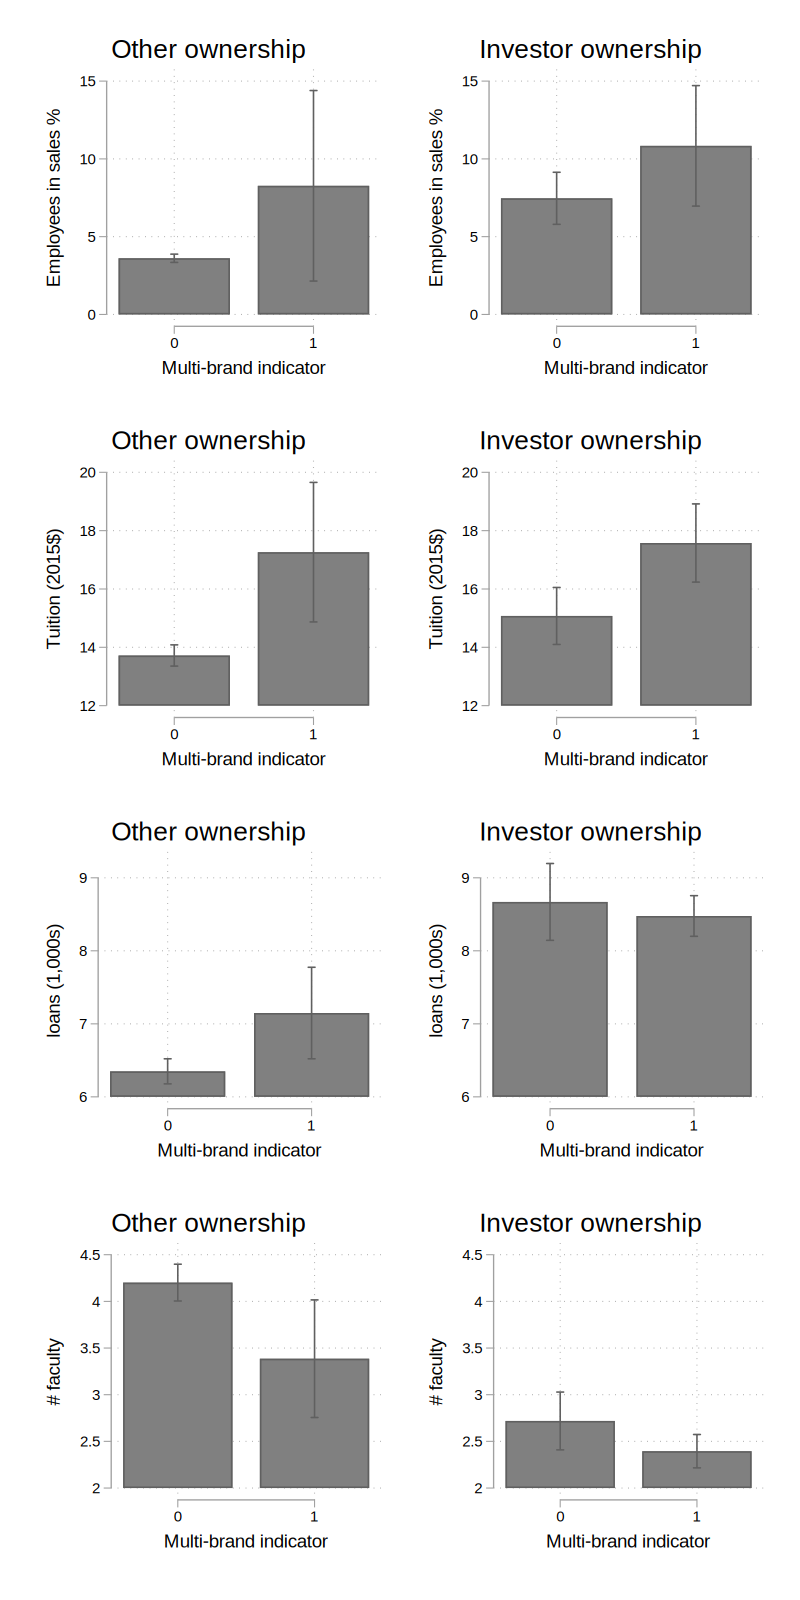

In [7]:
graph combine fracsales2 tuitionall_c_w loan_amount_borrower_c_w ft_faculty_per_100fte_w, ///
col(1) ysize(12) imargin(zero) scale(1.2)
quietly graph export figures/fa5a_adjustedinteraction.pdf, replace

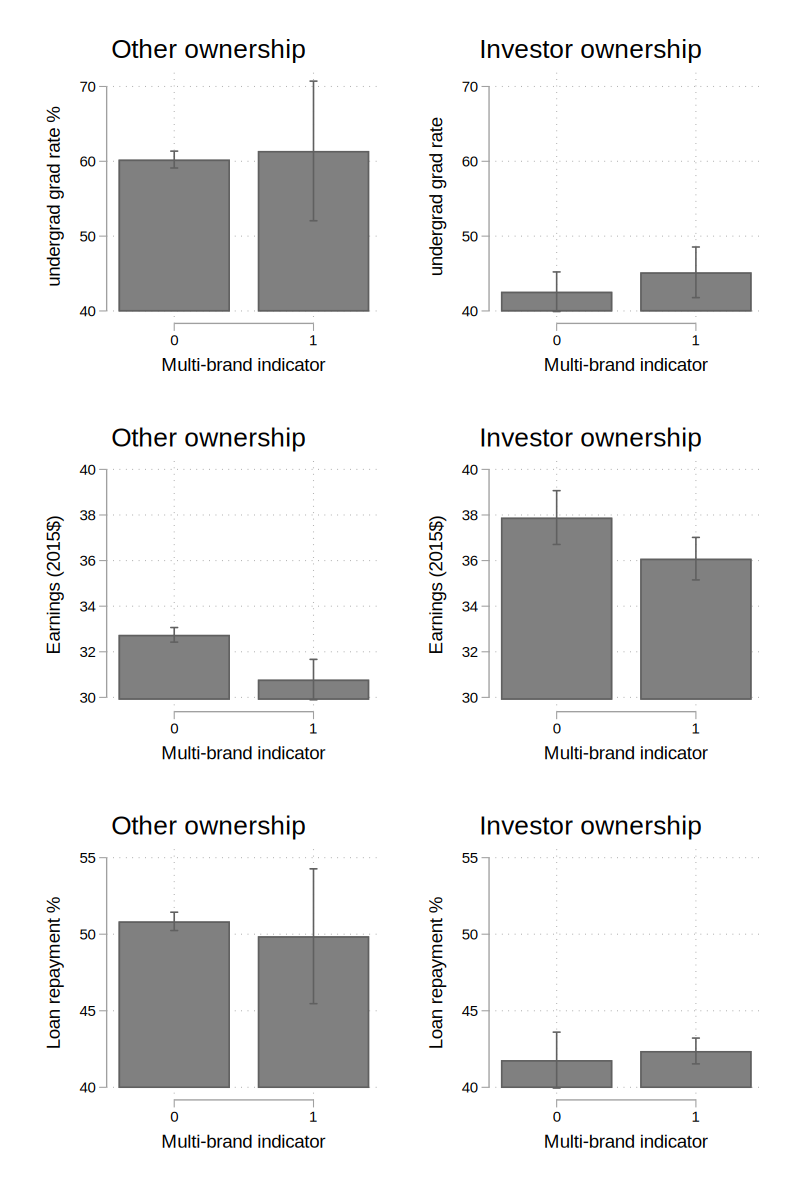




(file figures/fa5b_adjustedinteraction.pdf written in PDF format)


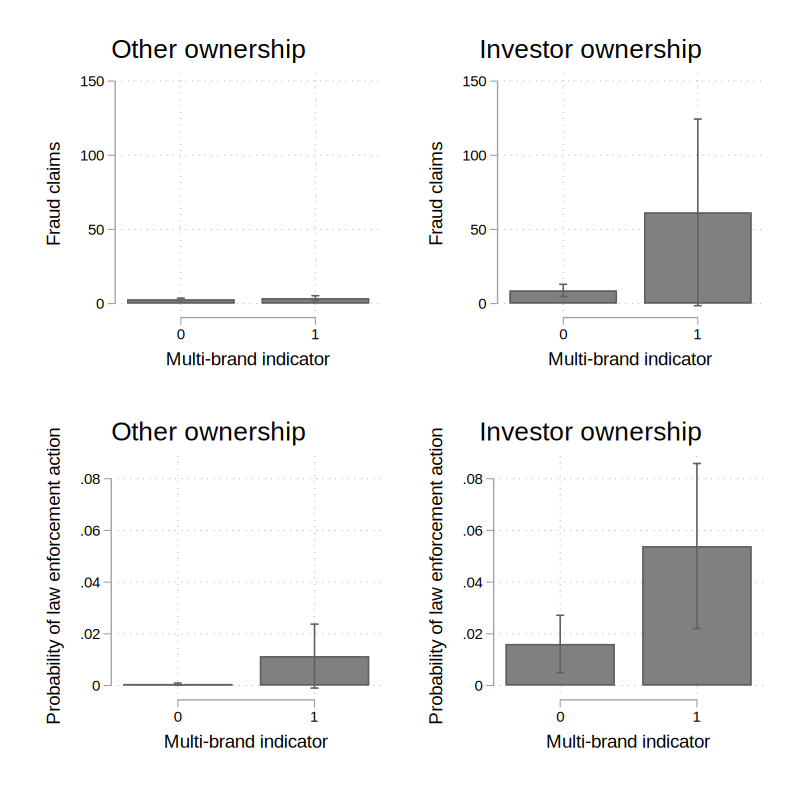




(file figures/fa5c_adjustedinteraction.pdf written in PDF format)


In [8]:
graph combine grad_rate_150_p_w mn_earn_wne_p6_c_w rpy_3yr_rt_supp_w, ///
col(1) ysize(9) imargin(zero) scale(1.2)
graph export figures/fa5b_adjustedinteraction.pdf, replace
graph combine defense law_enf_frst_this_yr, ///
col(1) ysize(6) imargin(zero) scale(1.2)
graph export figures/fa5c_adjustedinteraction.pdf, replace

## Counts of schools/firms that are Investor owned and Multi-brand by year

In [9]:
quietly {
    quietly use data/d_unitidasymmetry, clear
    quietly sort unitid year
quietly xtset unitid year
    quietly gen changetomulti=1 if multi_brand==1 & l.multi_brand==0
quietly gen investchange=1 if investor==1 & changetomulti==1
quietly gen otherchange=1 if investor==0 & changetomulti==1
quietly gen changeyear=year if changetomulti==1
quietly bysort unitid: egen minchangeyear=min(changeyear)
quietly gen investmulti=1 if investor==1 & multi_brand==1
quietly gen othermult=1 if investor==0 & multi_brand==1
quietly gen fullcontrol =1 if pell_grants_per_fte_c_w!=. & dpcttype_arts!=. & all_under!=. & white_share_w!=.
    bys unitid: egen minyear=min(year) if tuitionall_c_w!=. & fullcontrol==1
    bys unitid: egen minmultiyear=min(year) if multi_brand==1 & tuitionall_c_w!=. & fullcontrol==1
    bys unitid: egen minminvestyear=min(year) if investor==1 & tuitionall_c_w!=. & fullcontrol==1
}    

In [10]:
tab year if dpcttype_arts!=.
tab year if white_share!=.

tab year if tuitionall_c_w!=. & white_share_w!=.
tab multi_brand if tuitionall_c_w!=. & fullcontrol==1
tab multi_brand if year==minyear

tab year if minmultiyear==year
tab year if minmultiyear==year & changetomulti==1

tab year if minminvestyear==year

tab year if multi_brand==1 & tuitionall_c_w!=. & fullcontrol==1


display "schools by when they became multi-brand that are investor owned"
tab year if changetomulti==1 & investor==1 & minchangeyear==year
display "schools by when they became multi-brand that are not investor owned"
tab year if changetomulti==1 & investor==0  & minchangeyear==year

display "multi-brand institution-year observations by ownership form"
tabstat investmulti othermult, s(sum)



       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1990 |        616        0.97        0.97
       1991 |        617        0.97        1.93
       1992 |        649        1.02        2.95
       1993 |        673        1.06        4.01
       1994 |        735        1.15        5.16
       1995 |      3,102        4.86       10.02
       1996 |      2,410        3.78       13.80
       1997 |      2,259        3.54       17.34
       1998 |      2,168        3.40       20.74
       1999 |      2,218        3.48       24.22
       2000 |      2,266        3.55       27.77
       2001 |      2,254        3.53       31.30
       2002 |      2,294        3.60       34.90
       2003 |      2,374        3.72       38.62
       2004 |      2,435        3.82       42.44
       2005 |      2,561        4.02       46.46
       2006 |      2,658        4.17       50.62
       2007 |      2,696        4.23       54.85
       2008 |     

In [12]:
quietly {
        quietly use data/d_unitidasymmetry, clear
    
quietly collapse (rawsum) sftesale sftetotl (mean) all_under system_under grad_rate_150_p_w ///
loan_amount_borrower_c_w tuitionall_c_w selective white_share_w black_share_w hisp_share_w ///
pell_grants_per_fte_c_w ft_faculty_per_100fte_w dpcttype_health dpcttype_law ///
dpcttype_culinarycosmetic dpcttype_arts dpcttype_tech dpcttype_biz online ///
(first) state_n (min) iclevel (max) law_enf_frst_this_yr multi_brand investor, by(systemid year)

    quietly xtset systemid year

quietly gen changetomulti=1 if multi_brand==1 & l.multi_brand==0
quietly gen investchange=1 if investor==1 & changetomulti==1
quietly gen otherchange=1 if investor==0 & changetomulti==1

quietly gen changeyear=year if changetomulti==1
quietly bysort systemid: egen minchangeyear=min(changeyear)

quietly gen investmulti=1 if investor==1 & multi_brand==1
quietly gen othermult=1 if investor==0 & multi_brand==1
quietly gen fullcontrol =1 if pell_grants_per_fte_c_w!=. & dpcttype_arts!=. & all_under!=. & white_share_w!=.
    bys systemid: egen minyear=min(year) if tuitionall_c_w!=. & fullcontrol==1
    bys systemid: egen minmultiyear=min(year) if multi_brand==1 & tuitionall_c_w!=. & fullcontrol==1
    bys systemid: egen mininvestoryear=min(year) if investchange==1 & tuitionall_c_w!=. & fullcontrol==1
}

In [14]:
tab year if minmultiyear==year
tab year if minmultiyear==year & changetomulti==1

tab multi_brand if tuitionall_c_w!=. & fullcontrol==1
tab multi_brand if year==minyear

tab year if mininvestoryear==year
display "firms by when they became multi-brand that are investor owned"
tab year if changetomulti==1 & investor==1 & minchangeyear==year
display "firms by when they became multi-brand that are not investor owned"
tab year if changetomulti==1 & investor==0  & minchangeyear==year

display "multi-brand firm-year observations by ownership form"
tabstat investmulti othermult, s(sum)



       year |      Freq.     Percent        Cum.
------------+-----------------------------------
       1992 |          3        4.84        4.84
       1993 |          1        1.61        6.45
       1994 |          6        9.68       16.13
       1995 |          2        3.23       19.35
       1997 |          2        3.23       22.58
       1998 |          2        3.23       25.81
       2000 |         11       17.74       43.55
       2001 |          5        8.06       51.61
       2002 |          4        6.45       58.06
       2003 |          5        8.06       66.13
       2004 |          3        4.84       70.97
       2005 |          1        1.61       72.58
       2006 |          2        3.23       75.81
       2008 |          3        4.84       80.65
       2009 |          1        1.61       82.26
       2010 |          3        4.84       87.10
       2011 |          3        4.84       91.94
       2012 |          2        3.23       95.16
       2013 |     